In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import scipy.stats as stats
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 20
pd.options.display.max_columns = 100
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [2]:
df_ver0= pd.read_csv('Model 8-12.1 final VERIFICATION-table.csv', skiprows = 6)
df_ver2= pd.read_csv('Model 8-12.1 final VERIFICATION2-table.csv', skiprows = 6)
df_ver3= pd.read_csv('Model 8-12.1 final VERIFICATION3-table.csv', skiprows = 6)
df_ver4= pd.read_csv('Model 8-12.1 final VERIFICATION4-table.csv', skiprows = 6)

In [3]:
df_ver0.head()

,[run number],intv1,intv2,intv3,region,#-developers,#-households,MW-block-init-kW-res,MW-block-init-kW-com,e-price-effect,csp-true,[step],sum [electricity-bill] of households,sum [project-costs-2] of households,sum [own-usage] of households,sum [own-prod] of households,sum [prod-csp] of households,sum [emissions] of households,count households with [switched-pv = true],count households with [signed-to-csp = true],count households with [able-to-cs = true],count households with [NPV > 0] with [has-rooftop? = true],count households with [savings > project-costs] with [has-rooftop? = true],mean [age] of households,mean [income] of households,mean [education] of households,mean [savings] of households,count developers,pot-profit
0,1,False,False,False,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,450984.402090,0.0,0,1.241885e+08,0,0,0,0,0,-0.001471,-0.002545,-0.011637,0.000000,0,0
1,5,False,False,False,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,449669.770371,0.0,0,1.238265e+08,0,0,0,0,0,0.003402,-0.016277,-0.022468,0.000000,0,0
2,2,False,False,False,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,451232.803565,0.0,0,1.242569e+08,0,0,0,0,0,-0.008697,0.007906,0.011332,0.000000,0,0
3,6,False,False,False,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,444790.562183,0.0,0,1.224829e+08,0,0,0,0,0,-0.031537,-0.023024,-0.032987,0.000000,0,0
4,1,False,False,False,ConEd,0,2000,150,120,False,False,1,101020.506068,0.0,450984.402090,0.0,0,1.241885e+08,0,0,0,0,629,-0.001471,-0.002545,-0.011637,4217.126494,0,0


In [4]:
df_ver0['runs']= 50
df_ver2['runs']= 100
df_ver3['runs']= 200
df_ver4['runs']= 500

In [5]:
frames = [df_ver0, df_ver2, df_ver3, df_ver4]
df = pd.concat(frames)

In [6]:
df = pd.get_dummies(df, columns=['intv1'], drop_first=True)
df = pd.get_dummies(df, columns=['intv2'], drop_first=True)
df = pd.get_dummies(df, columns=['intv3'], drop_first=True)

In [7]:
list(df.columns) 

['[run number]',
 'region',
 '#-developers',
 '#-households',
 'MW-block-init-kW-res',
 'MW-block-init-kW-com',
 'e-price-effect',
 'csp-true',
 '[step]',
 'sum [electricity-bill] of households',
 'sum [project-costs-2] of households',
 'sum [own-usage] of households',
 'sum [own-prod] of households',
 'sum [prod-csp] of households',
 'sum [emissions] of households',
 'count households with [switched-pv = true]',
 'count households with [signed-to-csp = true]',
 'count households with [able-to-cs = true]',
 'count households with [NPV > 0] with [has-rooftop? = true]',
 'count households with [savings > project-costs] with [has-rooftop? = true]',
 'mean [age] of households',
 'mean [income] of households',
 'mean [education] of households',
 'mean [savings] of households',
 'count developers',
 'pot-profit',
 'runs']

In [8]:
rename_list = ['[run number]', 'region', '#-developers', '#-households', 
               'MW-block-init-kW-res', 'MW-block-init-kW-com',
               'e-price-effect' , 'csp-true', #'MW-mult'
                'tick', 'total-elec-bill', 'total-proj-cost', 'elect-usage', 
               'prod-hh','csp-prod', 'emissions-hh', '#-hh-rpv', '#-hh-csp' , 'able-to-cs' ,
              'pos-npv' , 'pos-savings', 'avg-age', 'avg-income' , 'avg-education', 'avg-savings','developers',
               'estimated profit developers','runs'
              ]
len(rename_list)

27

In [9]:
df.columns  = rename_list

In [10]:
#Availability per step
def fkpi11 (df):
    total_elec = df['elect-usage'] + df['prod-hh'] + df['csp-prod']
    total_re = df['prod-hh'] + df['csp-prod']
    kpi1 = total_re / total_elec * 100 
    return kpi1

In [11]:
df['Availability'] = df.apply(fkpi11, axis=1)
df['Availability'].mean()
df

2.0253319944247865

,[run number],region,#-developers,#-households,MW-block-init-kW-res,MW-block-init-kW-com,e-price-effect,csp-true,tick,total-elec-bill,total-proj-cost,elect-usage,prod-hh,csp-prod,emissions-hh,#-hh-rpv,#-hh-csp,able-to-cs,pos-npv,pos-savings,avg-age,avg-income,avg-education,avg-savings,developers,estimated profit developers,runs,Availability
0,1,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,450984.402090,0.000000,0,1.241885e+08,0,0,0,0,0,-0.001471,-0.002545,-0.011637,0.000000,0,0,50,0.000000
1,5,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,449669.770371,0.000000,0,1.238265e+08,0,0,0,0,0,0.003402,-0.016277,-0.022468,0.000000,0,0,50,0.000000
2,2,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,451232.803565,0.000000,0,1.242569e+08,0,0,0,0,0,-0.008697,0.007906,0.011332,0.000000,0,0,50,0.000000
3,6,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,444790.562183,0.000000,0,1.224829e+08,0,0,0,0,0,-0.031537,-0.023024,-0.032987,0.000000,0,0,50,0.000000
4,1,ConEd,0,2000,150,120,False,False,1,101020.506068,0.0,450984.402090,0.000000,0,1.241885e+08,0,0,0,0,629,-0.001471,-0.002545,-0.011637,4217.126494,0,0,50,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260495,500,ConEd,0,2000,150,120,False,False,516,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5276.983619,0,0,500,3.174140
260496,500,ConEd,0,2000,150,120,False,False,517,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5279.300423,0,0,500,3.174140
260497,500,ConEd,0,2000,150,120,False,False,518,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5281.620395,0,0,500,3.174140
260498,500,ConEd,0,2000,150,120,False,False,519,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5283.943441,0,0,500,3.174140


In [12]:
#Affordability per step
def fkpi21 (df):
    total_inv = df['total-proj-cost']
    total_elec_bill = df['total-elec-bill']
    avg_cost = (total_inv + total_elec_bill)
    return avg_cost

In [13]:
df['Affordability'] = df.apply(fkpi21, axis=1)
df['Affordability'].mean()

97727.36464880822

In [14]:
#Accessibility per step
def fkpi31 (df):
    total_elec = df['elect-usage'] + df['prod-hh'] + df['csp-prod']
    total_clas = df['elect-usage']
    total_rpv = df['prod-hh']
    total_csp = df['csp-prod']
    perc_clas = total_clas / total_elec
    perc_rpv = total_rpv / total_elec
    perc_csp = total_csp / total_elec
    if total_csp != 0 and total_rpv != 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_rpv * np.log(perc_rpv)) + (perc_csp * np.log(perc_csp)))
    if total_csp <= 0 and total_rpv > 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_rpv * np.log(perc_rpv)))
    if total_rpv <= 0 and total_csp > 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_csp * np.log(perc_csp)))
    if total_rpv <= 0 and total_csp <= 0 :
        div = 0
    
    return div  

In [15]:
df['Accessibility'] = df.apply(fkpi31, axis=1)
df['Accessibility'].mean()
df

0.0971763578641389

,[run number],region,#-developers,#-households,MW-block-init-kW-res,MW-block-init-kW-com,e-price-effect,csp-true,tick,total-elec-bill,total-proj-cost,elect-usage,prod-hh,csp-prod,emissions-hh,#-hh-rpv,#-hh-csp,able-to-cs,pos-npv,pos-savings,avg-age,avg-income,avg-education,avg-savings,developers,estimated profit developers,runs,Availability,Affordability,Accessibility
0,1,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,450984.402090,0.000000,0,1.241885e+08,0,0,0,0,0,-0.001471,-0.002545,-0.011637,0.000000,0,0,50,0.000000,0.000000,0.000000
1,5,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,449669.770371,0.000000,0,1.238265e+08,0,0,0,0,0,0.003402,-0.016277,-0.022468,0.000000,0,0,50,0.000000,0.000000,0.000000
2,2,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,451232.803565,0.000000,0,1.242569e+08,0,0,0,0,0,-0.008697,0.007906,0.011332,0.000000,0,0,50,0.000000,0.000000,0.000000
3,6,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,444790.562183,0.000000,0,1.224829e+08,0,0,0,0,0,-0.031537,-0.023024,-0.032987,0.000000,0,0,50,0.000000,0.000000,0.000000
4,1,ConEd,0,2000,150,120,False,False,1,101020.506068,0.0,450984.402090,0.000000,0,1.241885e+08,0,0,0,0,629,-0.001471,-0.002545,-0.011637,4217.126494,0,0,50,0.000000,101020.506068,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260495,500,ConEd,0,2000,150,120,False,False,516,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5276.983619,0,0,500,3.174140,94095.550566,0.140744
260496,500,ConEd,0,2000,150,120,False,False,517,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5279.300423,0,0,500,3.174140,94095.550566,0.140744
260497,500,ConEd,0,2000,150,120,False,False,518,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5281.620395,0,0,500,3.174140,94095.550566,0.140744
260498,500,ConEd,0,2000,150,120,False,False,519,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5283.943441,0,0,500,3.174140,94095.550566,0.140744


In [16]:
#Acceptability per step
def fkpi41 (df):
    total_em = df['emissions-hh']
    return total_em

In [17]:
df['Acceptability'] = df.apply(fkpi41, axis=1)
df['Acceptability'].mean()

121547968.69205534

In [18]:
#New affordability per step
def fkpi51 (df):
    total_aff = df['#-hh-csp'] + df['pos-savings']
    return total_aff

In [19]:
df['Ability'] = df.apply(fkpi51, axis=1)
df['Ability'].mean()

423.30187196567687

In [20]:
#New acceptability per step
def fkpi61 (df):
    total_acc = df['pos-npv'] + df['#-hh-csp']
    return total_acc

In [21]:
df['Appeal'] = df.apply(fkpi61, axis=1)
df['Appeal'].mean()
df

307.0640645816868

,[run number],region,#-developers,#-households,MW-block-init-kW-res,MW-block-init-kW-com,e-price-effect,csp-true,tick,total-elec-bill,total-proj-cost,elect-usage,prod-hh,csp-prod,emissions-hh,#-hh-rpv,#-hh-csp,able-to-cs,pos-npv,pos-savings,avg-age,avg-income,avg-education,avg-savings,developers,estimated profit developers,runs,Availability,Affordability,Accessibility,Acceptability,Ability,Appeal
0,1,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,450984.402090,0.000000,0,1.241885e+08,0,0,0,0,0,-0.001471,-0.002545,-0.011637,0.000000,0,0,50,0.000000,0.000000,0.000000,1.241885e+08,0,0
1,5,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,449669.770371,0.000000,0,1.238265e+08,0,0,0,0,0,0.003402,-0.016277,-0.022468,0.000000,0,0,50,0.000000,0.000000,0.000000,1.238265e+08,0,0
2,2,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,451232.803565,0.000000,0,1.242569e+08,0,0,0,0,0,-0.008697,0.007906,0.011332,0.000000,0,0,50,0.000000,0.000000,0.000000,1.242569e+08,0,0
3,6,ConEd,0,2000,150,120,False,False,0,0.000000,0.0,444790.562183,0.000000,0,1.224829e+08,0,0,0,0,0,-0.031537,-0.023024,-0.032987,0.000000,0,0,50,0.000000,0.000000,0.000000,1.224829e+08,0,0
4,1,ConEd,0,2000,150,120,False,False,1,101020.506068,0.0,450984.402090,0.000000,0,1.241885e+08,0,0,0,0,629,-0.001471,-0.002545,-0.011637,4217.126494,0,0,50,0.000000,101020.506068,0.000000,1.241885e+08,629,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260495,500,ConEd,0,2000,150,120,False,False,516,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5276.983619,0,0,500,3.174140,94095.550566,0.140744,1.201797e+08,446,299
260496,500,ConEd,0,2000,150,120,False,False,517,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5279.300423,0,0,500,3.174140,94095.550566,0.140744,1.201797e+08,446,299
260497,500,ConEd,0,2000,150,120,False,False,518,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5281.620395,0,0,500,3.174140,94095.550566,0.140744,1.201797e+08,446,299
260498,500,ConEd,0,2000,150,120,False,False,519,94095.550566,0.0,434306.845245,14237.423077,0,1.201797e+08,177,0,0,299,446,0.011941,-0.014909,-0.002271,5283.943441,0,0,500,3.174140,94095.550566,0.140744,1.201797e+08,446,299


In [22]:
df_set = df[df['tick'] == 520]

In [23]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [24]:
kpi_list = ['Availability', 'Affordability', 'Accessibility', 'Acceptability', 'Ability', 'Appeal' ]

In [25]:
ss1 = df_set[(df_set['runs'] == 50 )]
ss2 = df_set[(df_set['runs'] == 100 )]
ss3 = df_set[(df_set['runs'] == 200 )]
ss4 = df_set[(df_set['runs'] == 500 )]

Text(4.6, 15, 'Skewness: 0.204844')

Text(4.6, 14, 'Kurtosis: 2.902398')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Availability')

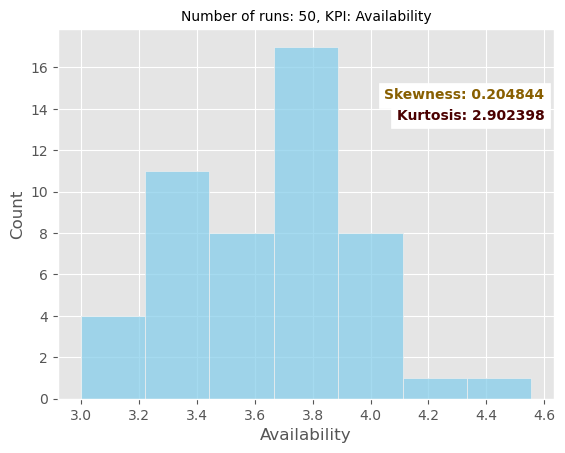

In [51]:
fig = sns.histplot(ss1['Availability'], color="skyblue")
plt.text(x=4.6, y=15, s="Skewness: %f" % skew(ss1['Availability'], axis=0, bias=True),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
    backgroundcolor='white', color='xkcd:poo brown')
plt.text(x=4.6, y=14, s="Kurtosis: %f" % kurtosis(ss1['Availability'], axis=0,fisher =  False, bias=True),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
    backgroundcolor='white', color='xkcd:dried blood')
fig.set_title(f'Number of runs: 50, KPI: Availability', fontsize = 10)

In [85]:
for i in kpi_list:
    f, ax = plt.subplots(1)
    sns.histplot(ss1[i], color="skyblue")
    ax.text(x=1,  y=0.9, transform=ax.transAxes, s="Skewness: %f" % skew(ss1[i], axis=0, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=1, y=0.82 , transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(ss1[i], axis=0,fisher =  False, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
    ax.set_title(f'Number of runs: 50, KPI: {i}', fontsize = 10)
    plt.savefig(f'runs 50, kpi:{i}',bbox_inches="tight")
    plt.close()

<AxesSubplot:xlabel='Availability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.204844')

Text(1, 0.82, 'Kurtosis: 2.902398')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Availability')

<AxesSubplot:xlabel='Affordability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 2.437271')

Text(1, 0.82, 'Kurtosis: 10.393112')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Affordability')

<AxesSubplot:xlabel='Accessibility', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.129350')

Text(1, 0.82, 'Kurtosis: 2.793608')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Accessibility')

<AxesSubplot:xlabel='Acceptability', ylabel='Count'>

Text(1, 0.9, 'Skewness: -0.061460')

Text(1, 0.82, 'Kurtosis: 2.306999')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Acceptability')

<AxesSubplot:xlabel='Ability', ylabel='Count'>

Text(1, 0.9, 'Skewness: -0.222709')

Text(1, 0.82, 'Kurtosis: 2.441976')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Ability')

<AxesSubplot:xlabel='Appeal', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.199993')

Text(1, 0.82, 'Kurtosis: 2.581622')

Text(0.5, 1.0, 'Number of runs: 50, KPI: Appeal')

In [86]:
for i in kpi_list:
    f, ax = plt.subplots(1)
    sns.histplot(ss2[i], color="skyblue")
    ax.text(x=1,  y=0.9, transform=ax.transAxes, s="Skewness: %f" % skew(ss2[i], axis=0, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=1, y=0.82 , transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(ss2[i], axis=0,fisher =  False, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
    ax.set_title(f'Number of runs: 100, KPI: {i}', fontsize = 10)
    plt.savefig(f'runs 100, kpi:{i}',bbox_inches="tight")
    plt.close()

<AxesSubplot:xlabel='Availability', ylabel='Count'>

Text(1, 0.9, 'Skewness: -0.308221')

Text(1, 0.82, 'Kurtosis: 3.602023')

Text(0.5, 1.0, 'Number of runs: 100, KPI: Availability')

<AxesSubplot:xlabel='Affordability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 2.138935')

Text(1, 0.82, 'Kurtosis: 7.666439')

Text(0.5, 1.0, 'Number of runs: 100, KPI: Affordability')

<AxesSubplot:xlabel='Accessibility', ylabel='Count'>

Text(1, 0.9, 'Skewness: -0.411896')

Text(1, 0.82, 'Kurtosis: 3.708831')

Text(0.5, 1.0, 'Number of runs: 100, KPI: Accessibility')

<AxesSubplot:xlabel='Acceptability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.162564')

Text(1, 0.82, 'Kurtosis: 2.691503')

Text(0.5, 1.0, 'Number of runs: 100, KPI: Acceptability')

<AxesSubplot:xlabel='Ability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.248843')

Text(1, 0.82, 'Kurtosis: 3.647917')

Text(0.5, 1.0, 'Number of runs: 100, KPI: Ability')

<AxesSubplot:xlabel='Appeal', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.080101')

Text(1, 0.82, 'Kurtosis: 2.436676')

Text(0.5, 1.0, 'Number of runs: 100, KPI: Appeal')

In [87]:
for i in kpi_list:
    f, ax = plt.subplots(1)
    sns.histplot(ss3[i], color="skyblue")
    ax.text(x=1,  y=0.9, transform=ax.transAxes, s="Skewness: %f" % skew(ss3[i], axis=0, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=1, y=0.82 , transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(ss3[i], axis=0,fisher =  False, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
    ax.set_title(f'Number of runs: 200, KPI: {i}', fontsize = 10)
    plt.savefig(f'runs 200, kpi:{i}',bbox_inches="tight")
    plt.close()

<AxesSubplot:xlabel='Availability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.251837')

Text(1, 0.82, 'Kurtosis: 2.754564')

Text(0.5, 1.0, 'Number of runs: 200, KPI: Availability')

<AxesSubplot:xlabel='Affordability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 2.996680')

Text(1, 0.82, 'Kurtosis: 13.112742')

Text(0.5, 1.0, 'Number of runs: 200, KPI: Affordability')

<AxesSubplot:xlabel='Accessibility', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.182613')

Text(1, 0.82, 'Kurtosis: 2.724702')

Text(0.5, 1.0, 'Number of runs: 200, KPI: Accessibility')

<AxesSubplot:xlabel='Acceptability', ylabel='Count'>

Text(1, 0.9, 'Skewness: -0.177813')

Text(1, 0.82, 'Kurtosis: 2.802609')

Text(0.5, 1.0, 'Number of runs: 200, KPI: Acceptability')

<AxesSubplot:xlabel='Ability', ylabel='Count'>

Text(1, 0.9, 'Skewness: -0.088904')

Text(1, 0.82, 'Kurtosis: 2.651244')

Text(0.5, 1.0, 'Number of runs: 200, KPI: Ability')

<AxesSubplot:xlabel='Appeal', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.014672')

Text(1, 0.82, 'Kurtosis: 2.892968')

Text(0.5, 1.0, 'Number of runs: 200, KPI: Appeal')

In [88]:
for i in kpi_list:
    f, ax = plt.subplots(1)
    sns.histplot(ss4[i], color="skyblue")
    ax.text(x=1,  y=0.9, transform=ax.transAxes, s="Skewness: %f" % skew(ss4[i], axis=0, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=1, y=0.82 , transform=ax.transAxes, s="Kurtosis: %f" % kurtosis(ss4[i], axis=0,fisher =  False, bias=True),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
    ax.set_title(f'Number of runs: 500, KPI: {i}', fontsize = 10)
    plt.savefig(f'runs 500, kpi:{i}',bbox_inches="tight")
    plt.close()

<AxesSubplot:xlabel='Availability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.228939')

Text(1, 0.82, 'Kurtosis: 3.072917')

Text(0.5, 1.0, 'Number of runs: 500, KPI: Availability')

<AxesSubplot:xlabel='Affordability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 3.403822')

Text(1, 0.82, 'Kurtosis: 18.967259')

Text(0.5, 1.0, 'Number of runs: 500, KPI: Affordability')

<AxesSubplot:xlabel='Accessibility', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.148942')

Text(1, 0.82, 'Kurtosis: 3.001355')

Text(0.5, 1.0, 'Number of runs: 500, KPI: Accessibility')

<AxesSubplot:xlabel='Acceptability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.075932')

Text(1, 0.82, 'Kurtosis: 2.759703')

Text(0.5, 1.0, 'Number of runs: 500, KPI: Acceptability')

<AxesSubplot:xlabel='Ability', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.002145')

Text(1, 0.82, 'Kurtosis: 2.925035')

Text(0.5, 1.0, 'Number of runs: 500, KPI: Ability')

<AxesSubplot:xlabel='Appeal', ylabel='Count'>

Text(1, 0.9, 'Skewness: 0.011895')

Text(1, 0.82, 'Kurtosis: 3.107370')

Text(0.5, 1.0, 'Number of runs: 500, KPI: Appeal')